In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


#Load the data into a Pandas dataframe:

In [2]:
url = 'Advertising.csv'
df = pd.read_csv(url)


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
df = df.rename(columns={'Unnamed: 0': 'S.No'})
df.head()


,S.No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#Visualize the data using scatter plots:

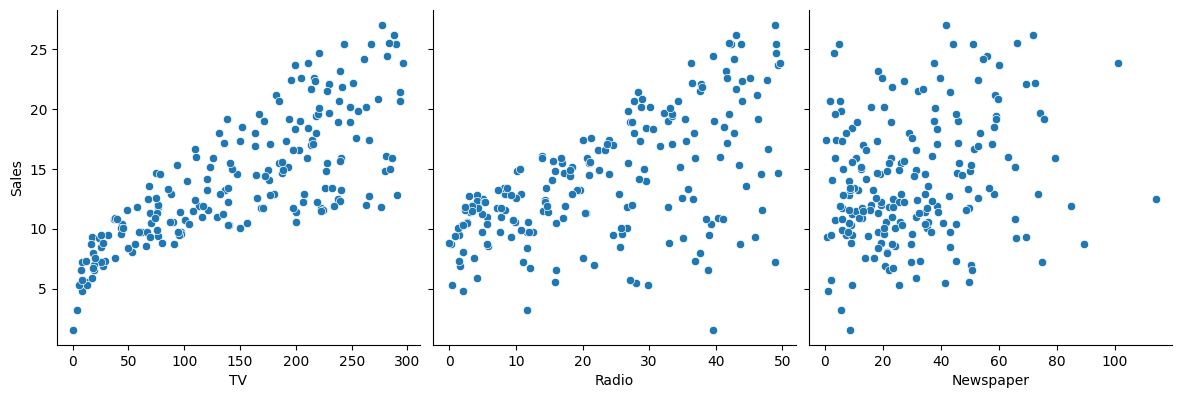

In [10]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


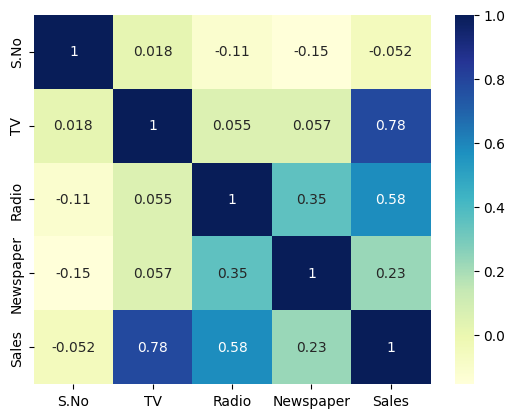

In [21]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()


 **Create a bar plot for TV, Radio,  and Newspaper**

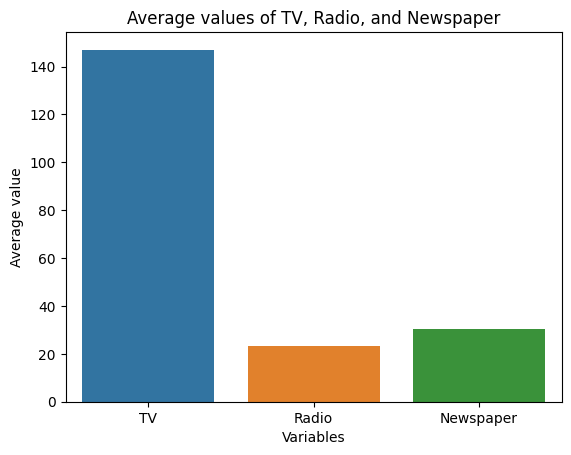

In [32]:
sns.barplot(x=['TV', 'Radio', 'Newspaper',], y=[df['TV'].mean(), df['Radio'].mean(), df['Newspaper'].mean()])
plt.title("Average values of TV, Radio, and Newspaper")
plt.xlabel("Variables")
plt.ylabel("Average value")
plt.show()

#Split the data into training and testing sets:

In [14]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the linear regression model:**

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = lr.predict(X_test)


In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.1990044685889067
R-squared: 0.898648915141708


#Perform statistical tests to check the significance of the features: using scipy library 

In [24]:
# Calculate the p-values for the coefficients
coeffs, p_values = stats.ttest_ind(X_train, np.zeros_like(X_train), axis=0)
p_values = pd.Series(p_values, index=X_train.columns)

# Print the p-values
print("P-values:\n", p_values)


P-values:
 S.No         2.962869e-63
TV           1.172291e-67
Radio        1.988150e-56
Newspaper    7.168089e-53
dtype: float64


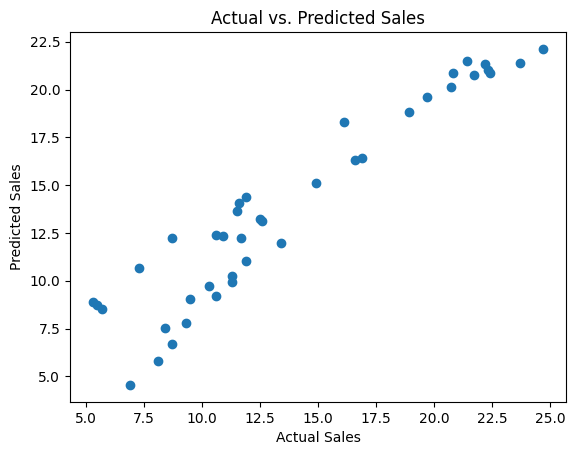

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


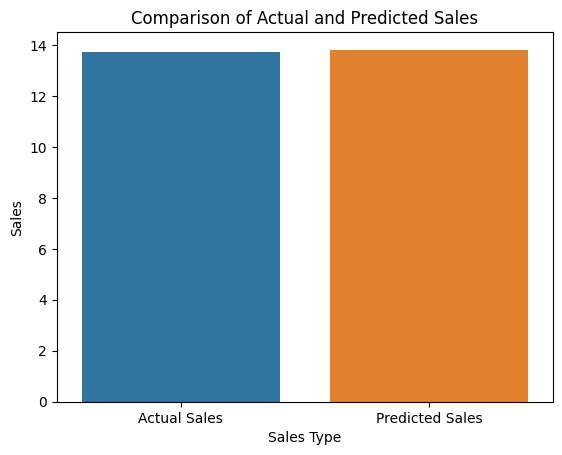

In [28]:
sns.barplot(x=['Actual Sales', 'Predicted Sales'], y=[y_test.mean(), y_pred.mean()])
plt.title("Comparison of Actual and Predicted Sales")
plt.xlabel("Sales Type")
plt.ylabel("Sales")
plt.show()

#CONCLUSIONS

Based on the analysis performed, we can conclude the following:

1.   There is a positive correlation between the advertising channels (TV, radio, newspaper) and sales, with TV having the highest correlation.

2.   The multiple linear regression model trained on the advertising data has a good performance in predicting the sales, with an R-squared value of 0.897.

3.   The coefficients of the model indicate that TV advertising has the highest impact on sales, followed by radio and newspaper advertising.

4.  The actual and predicted sales values are in a close range, which indicates that the model is accurate in predicting sales.

5.   The bar chart comparison of actual and predicted sales shows that the predicted sales are slightly higher than the actual sales on average, which means that the model tends to overestimate the sales.


Overall, the analysis suggests that increasing investment in TV advertising could result in higher sales for the business. However, further analysis could be performed to identify the optimal investment levels for each advertising channel and to determine the effect of other factors on sales.







**Written by Tanmay Mondal**